In [1]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

with open('/kaggle/input/iris-uci-ml-data/iris.data', 'r') as f:
    line = f.read()

print(line)


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa
4.6,3.4,1.4,0.3,Iris-setosa
5.0,3.4,1.5,0.2,Iris-setosa
4.4,2.9,1.4,0.2,Iris-setosa
4.9,3.1,1.5,0.1,Iris-setosa
5.4,3.7,1.5,0.2,Iris-setosa
4.8,3.4,1.6,0.2,Iris-setosa
4.8,3.0,1.4,0.1,Iris-setosa
4.3,3.0,1.1,0.1,Iris-setosa
5.8,4.0,1.2,0.2,Iris-setosa
5.7,4.4,1.5,0.4,Iris-setosa
5.4,3.9,1.3,0.4,Iris-setosa
5.1,3.5,1.4,0.3,Iris-setosa
5.7,3.8,1.7,0.3,Iris-setosa
5.1,3.8,1.5,0.3,Iris-setosa
5.4,3.4,1.7,0.2,Iris-setosa
5.1,3.7,1.5,0.4,Iris-setosa
4.6,3.6,1.0,0.2,Iris-setosa
5.1,3.3,1.7,0.5,Iris-setosa
4.8,3.4,1.9,0.2,Iris-setosa
5.0,3.0,1.6,0.2,Iris-setosa
5.0,3.4,1.6,0.4,Iris-setosa
5.2,3.5,1.5,0.2,Iris-setosa
5.2,3.4,1.4,0.2,Iris-setosa
4.7,3.2,1.6,0.2,Iris-setosa
4.8,3.1,1.6,0.2,Iris-setosa
5.4,3.4,1.5,0.4,Iris-setosa
5.2,4.1,1.5,0.1,Iris-setosa
5.5,4.2,1.4,0.2,Iris-setosa
4.9,3.1,1.5,0.1,Iris-setosa
5.0,3.2,1.2,0.2,Iris

In [2]:
with open('/kaggle/working/iris.csv', 'w') as f:
    f.write(line)

In [3]:
column_names = ['sepal length','sepal width','petal length','petal width','species']
dataset1 = pd.read_csv('/kaggle/working/iris.csv', names = column_names)
dataset1

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
X = dataset1.iloc[:,:-1]
y = dataset1.iloc[:,-1]

In [5]:
knn_model = KNeighborsClassifier()
knn_model.fit(X,y)

KNeighborsClassifier()

In [6]:
pred = knn_model.predict(X)

In [7]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y, pred))

[[50  0  0]
 [ 0 47  3]
 [ 0  2 48]]


In [8]:
print(classification_report(y, pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       0.96      0.94      0.95        50
 Iris-virginica       0.94      0.96      0.95        50

       accuracy                           0.97       150
      macro avg       0.97      0.97      0.97       150
   weighted avg       0.97      0.97      0.97       150



In [9]:
import numpy as np

loss = []
for i in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X,y)
    pred = knn_model.predict(X)
    loss.append(np.mean(pred != y))

In [10]:
loss

[0.0,
 0.02,
 0.04,
 0.04,
 0.03333333333333333,
 0.02666666666666667,
 0.02666666666666667,
 0.02,
 0.02,
 0.02,
 0.02666666666666667,
 0.02,
 0.02,
 0.02,
 0.013333333333333334,
 0.013333333333333334,
 0.02,
 0.02666666666666667,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02666666666666667,
 0.02,
 0.02666666666666667,
 0.02666666666666667,
 0.03333333333333333,
 0.02666666666666667]

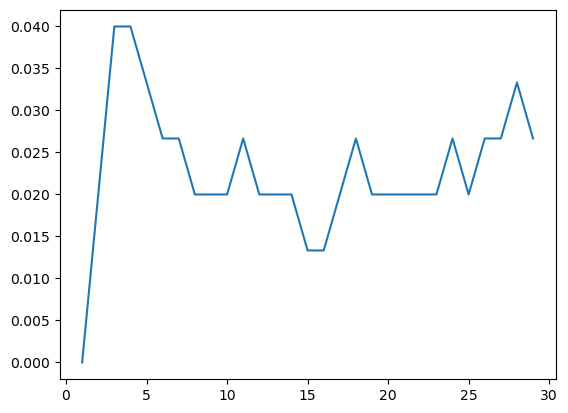

In [11]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(range(1,30),loss)
plt.show()